### 📈 Curvature Optimization

Once the spline is built:
- You must **replace the assumed boundary conditions** (like natural spline: second derivative = 0 at endpoints).
- Your goal is to **optimize** the spline such that the **total curvature is minimized**.
- This will result in a **smoother path**—which is desirable for autonomous vehicle trajectory planning.


### 🔍 What does Optimization mean here?
There are 3 parts to an optimization problem:
- Objective (or Cost) Function :
This is the function you want to minimize or maximize.
- Parameters (or Decision Variables):
These are the variables you are allowed to change in order to achieve the best value of the objective.
- Constraints:
These are the rules or limits that the parameters and/or the solution must satisfy.
In general, optimization means adjusting parameters to minimize or maximize an objective — like reducing cost, increasing speed, or in our case: minimizing curvature.

Here, you are given 4 fixed waypoints. Your goal is to interpolate these points using cubic splines, but with a twist:

refer to the first 3 videos of the following playlist for a better understanding:
[Video: Introduction to Curve Optimization](https://youtube.com/playlist?list=PLLK3oSbvdxFdF67yVxF_1FQO9SbBY3yTL&si=EMnkQ3Gb_EleDISu)

---
## 🎯 PROBLEM STATEMENT
You are given 4 discrete waypoints from the previous section. Your task is to interpolate these points using **cubic spline interpolation**, but with a focus on **optimizing the shape of the curve**.

Essentially, you are required to **minimize the total curvature** of the resulting spline by **varying the second derivative values at the boundaries**. This should be done **without using inbuilt spline functions** from libraries such as `scipy`. The goal is to find the **smoothest possible path** through the points, which would represent the **ideal trajectory** for a vehicle to follow. You may choose suitable bounds for the second derivative values and iterate through different combinations of boundary conditions to determine the configuration that leads to the **minimum total curvature**.

---

## Curvature Formula

The **curvature** $\kappa(t)$ of a 2D parametric curve $(x(t), y(t))$ is given by:

$$
\kappa(t) = \frac{ |x'(t)y''(t) - y'(t)x''(t)| }{ \left( (x'(t))^2 + (y'(t))^2 \right)^{3/2} }
$$

Where:
- $x'(t)$ and $y'(t)$ are the **first derivatives** with respect to the parameter $t$
- $x''(t)$ and $y''(t)$ are the **second derivatives**

---

## 📌 Deliverables

1. Your own implementation of cubic spline interpolation.
2. Plots of:
   - Original points
   - Interpolated spline without optimization
   - Interpolated spline with optimization
---

### 🌟 Optional Assignement

You may notice that directly finding the smoothest curve through waypoints seems inefficient and computationally expensive. Fortunately, mathematicians have developed robust optimization techniques that are readily available through libraries like `scipy.optimize`.

In this task, try enhancing the **cubic interpolation curve** you obtained earlier by finding an **optimal trajectory through the waypoints** — one that minimizes the curvature at every interpolated point. To do this, you can treat the **second derivatives at the curve’s boundaries** as variables to be optimized. Use `scipy` functions to perform this optimization and compare the resulting smooth curve to the original interpolation.

However, you may not notice an appreciable reduction in sharpness and a smoother, more natural path. What else can be done then for the **optimal raceline** for our car?

---

**Good luck!**  Let the paths be smooth and the math be satisfying!

Iter 0: Cost = 2.414919 | b0_x=-0.0172, bn_x=-0.1002, b0_y=0.0159, bn_y=0.0198
Iter 10: Cost = 1.707451 | b0_x=-0.0845, bn_x=-0.5848, b0_y=0.0931, bn_y=0.0666
Iter 20: Cost = 1.604258 | b0_x=-0.0869, bn_x=-0.7928, b0_y=0.1174, bn_y=0.0191
Iter 30: Cost = 1.558515 | b0_x=-0.0734, bn_x=-0.9254, b0_y=0.1272, bn_y=-0.0425
Iter 40: Cost = 1.531925 | b0_x=-0.0571, bn_x=-1.0216, b0_y=0.1329, bn_y=-0.0989
Iter 50: Cost = 1.515427 | b0_x=-0.0420, bn_x=-1.0954, b0_y=0.1375, bn_y=-0.1463
Iter 60: Cost = 1.504933 | b0_x=-0.0291, bn_x=-1.1535, b0_y=0.1419, bn_y=-0.1850
Iter 70: Cost = 1.498153 | b0_x=-0.0184, bn_x=-1.1999, b0_y=0.1463, bn_y=-0.2162
Iter 80: Cost = 1.493717 | b0_x=-0.0097, bn_x=-1.2375, b0_y=0.1508, bn_y=-0.2414
Iter 90: Cost = 1.490783 | b0_x=-0.0024, bn_x=-1.2680, b0_y=0.1551, bn_y=-0.2617
Iter 99: Cost = 1.488986 | b0_x=0.0030, bn_x=-1.2907, b0_y=0.1590, bn_y=-0.2766


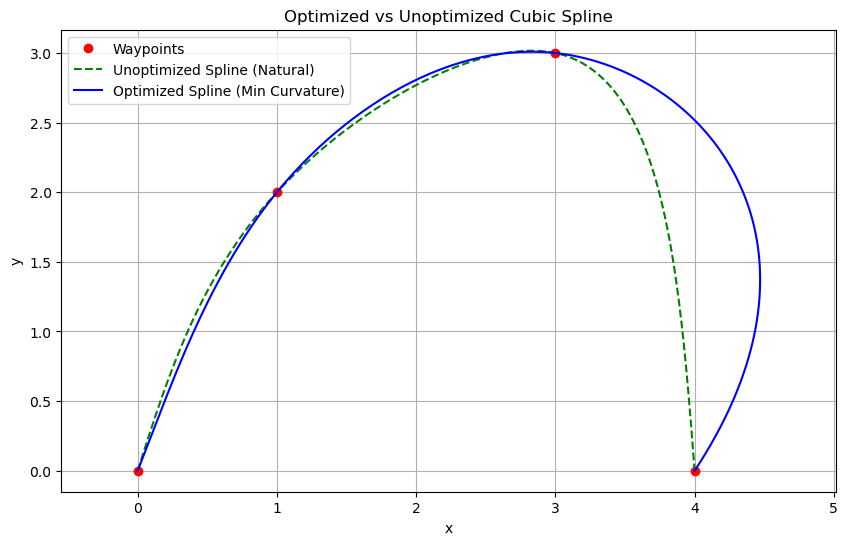

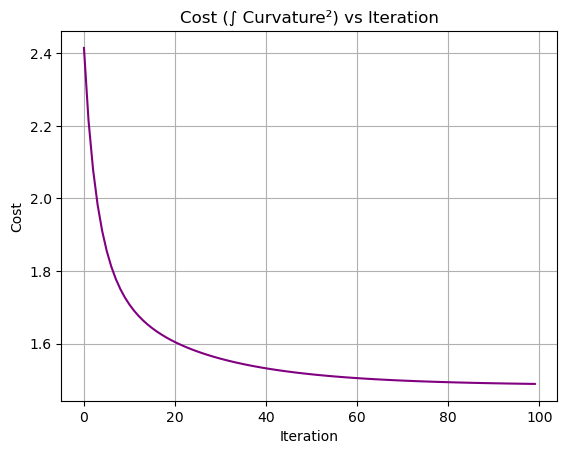

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# 1. Define waypoints
waypoints = np.array([
    [0, 0],
    [1, 2],
    [3, 3],
    [4, 0]
])
x = waypoints[:, 0]
y = waypoints[:, 1]

# 2. Arc-length parameterization for t
t = np.zeros(len(x))
for i in range(1, len(x)):
    t[i] = t[i-1] + np.hypot(x[i] - x[i-1], y[i] - y[i-1])

# 3. Compute curvature
def compute_curvature(x_t, y_t, t_vals):
    dx = np.gradient(x_t, t_vals)
    dy = np.gradient(y_t, t_vals)
    ddx = np.gradient(dx, t_vals)
    ddy = np.gradient(dy, t_vals)
    numerator = np.abs(dx * ddy - dy * ddx)
    denominator = (dx**2 + dy**2)**1.5 + 1e-8  # Avoid div by 0
    curvature = numerator / denominator
    return curvature

# 4. Cost function (curvature squared)
def cost_function(b0_x, bn_x, b0_y, bn_y, t, x, y, t_fine):
    cs_x = CubicSpline(t, x, bc_type=((2, b0_x), (2, bn_x)))
    cs_y = CubicSpline(t, y, bc_type=((2, b0_y), (2, bn_y)))

    x_vals = cs_x(t_fine)
    y_vals = cs_y(t_fine)

    curvature = compute_curvature(x_vals, y_vals, t_fine)
    cost = np.trapz(curvature**2, t_fine)
    return cost, x_vals, y_vals

# 5. Gradient Descent
def gradient_descent(t, x, y, t_fine, lr=0.01, iterations=100):
    b0_x, bn_x = 0.0, 0.0
    b0_y, bn_y = 0.0, 0.0
    cost_history = []

    for i in range(iterations):
        cost, _, _ = cost_function(b0_x, bn_x, b0_y, bn_y, t, x, y, t_fine)
        cost_history.append(cost)

        epsilon = 1e-5

        # Gradients (central difference)
        grad_b0x = (cost_function(b0_x + epsilon, bn_x, b0_y, bn_y, t, x, y, t_fine)[0] -
                    cost_function(b0_x - epsilon, bn_x, b0_y, bn_y, t, x, y, t_fine)[0]) / (2 * epsilon)
        grad_bnx = (cost_function(b0_x, bn_x + epsilon, b0_y, bn_y, t, x, y, t_fine)[0] -
                    cost_function(b0_x, bn_x - epsilon, b0_y, bn_y, t, x, y, t_fine)[0]) / (2 * epsilon)
        grad_b0y = (cost_function(b0_x, bn_x, b0_y + epsilon, bn_y, t, x, y, t_fine)[0] -
                    cost_function(b0_x, bn_x, b0_y - epsilon, bn_y, t, x, y, t_fine)[0]) / (2 * epsilon)
        grad_bny = (cost_function(b0_x, bn_x, b0_y, bn_y + epsilon, t, x, y, t_fine)[0] -
                    cost_function(b0_x, bn_x, b0_y, bn_y - epsilon, t, x, y, t_fine)[0]) / (2 * epsilon)

        # Update
        b0_x -= lr * grad_b0x
        bn_x -= lr * grad_bnx
        b0_y -= lr * grad_b0y
        bn_y -= lr * grad_bny

        if i % 10 == 0 or i == iterations - 1:
            print(f"Iter {i}: Cost = {cost:.6f} | b0_x={b0_x:.4f}, bn_x={bn_x:.4f}, b0_y={b0_y:.4f}, bn_y={bn_y:.4f}")
    
    _, x_opt, y_opt = cost_function(b0_x, bn_x, b0_y, bn_y, t, x, y, t_fine)
    return b0_x, bn_x, b0_y, bn_y, cost_history, x_opt, y_opt

# 6. Run optimization
t_fine = np.linspace(t[0], t[-1], 200)
b0_x, bn_x, b0_y, bn_y, cost_hist, x_opt, y_opt = gradient_descent(t, x, y, t_fine, lr=0.05, iterations=100)

# 7. Generate natural spline (unoptimized)
cs_x_nat = CubicSpline(t, x, bc_type='natural')
cs_y_nat = CubicSpline(t, y, bc_type='natural')
x_nat = cs_x_nat(t_fine)
y_nat = cs_y_nat(t_fine)

# 8. Plot results
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='Waypoints')
plt.plot(x_nat, y_nat, 'g--', label='Unoptimized Spline (Natural)')
plt.plot(x_opt, y_opt, 'b-', label='Optimized Spline (Min Curvature)')
plt.title("Optimized vs Unoptimized Cubic Spline")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()

# 9. Plot cost vs iteration
plt.figure()
plt.plot(cost_hist, color='purple')
plt.title("Cost (∫ Curvature²) vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()
